# Waste Management 

Waste Management, Inc. is an American waste management, comprehensive waste, and environmental services company in North America. Founded in 1968, the company is headquartered in the First City Tower in Houston, Texas.


# Definitions

1. Open- Price of a stock when the market opens for trading (For the day).
2. High- Highest price at which the stock was traded for on the given day.
3. Low- Lowest price at which the stock was traded for on the given day. 
4. Close- Price of the stock when the market closes for trading (For the day). 

Closing Price is the most important price because it is the final price at which the market closes. 
If closing price is higher than the opening, it is considered a positive day and vice versa. (Negative day). 


Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions.
The closing price is the 'raw' price which is just the cash value of the last transacted price before the market closes.
Adjusted closing price factors in corporate actions such as stock splits, dividends / distributions and rights offerings.

In [1]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

D:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
#WM 
#Getting stock price data

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()
df = web.DataReader("WM", 'yahoo', start, end)  # Collects data
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

#prices in USD

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,17.4375,16.8750,17.0000,17.1875,2933200.0,10.462649
2000-01-03,17.8750,16.6875,17.7500,17.3750,3833200.0,10.576781
2000-01-04,18.0000,17.1250,17.3125,17.3125,4736900.0,10.538737
2000-01-05,17.6250,17.1875,17.2500,17.3750,2676000.0,10.576781
2000-01-06,17.3750,16.6875,17.3750,17.2500,2428500.0,10.500694


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,106.089996,104.419998,105.790001,105.209999,1868200.0,105.209999
2020-07-07,105.260002,104.320000,104.720001,104.620003,1585000.0,104.620003
2020-07-08,104.510002,102.480003,104.050003,103.120003,1728400.0,103.120003
2020-07-09,103.000000,100.949997,102.879997,102.080002,2029500.0,102.080002
2020-07-10,103.860001,102.019997,102.019997,103.820000,1189200.0,103.820000


In [5]:
#Making the data as csv

df.to_csv("WM_data.csv")

In [6]:
#Reading the same data from local csv file

data=pd.read_csv("WM_data.csv" ,parse_dates=True, index_col=0)

Text(0, 0.5, 'Stock Value')

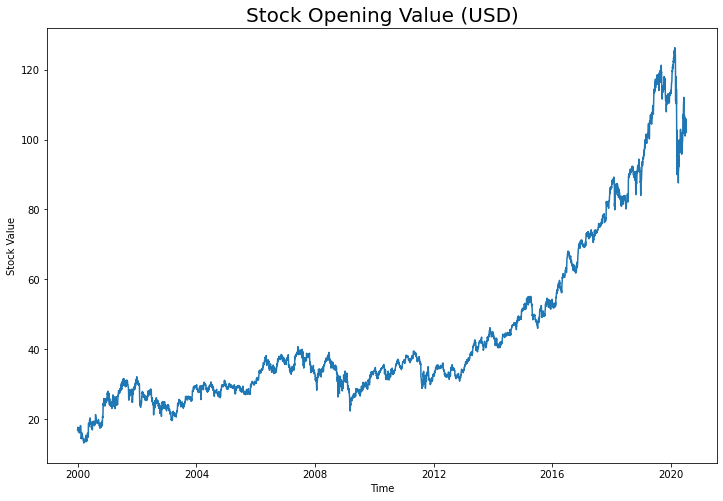

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(data["Open"])
plt.title('Stock Opening Value (USD)', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')

Text(0, 0.5, 'Stock Value')

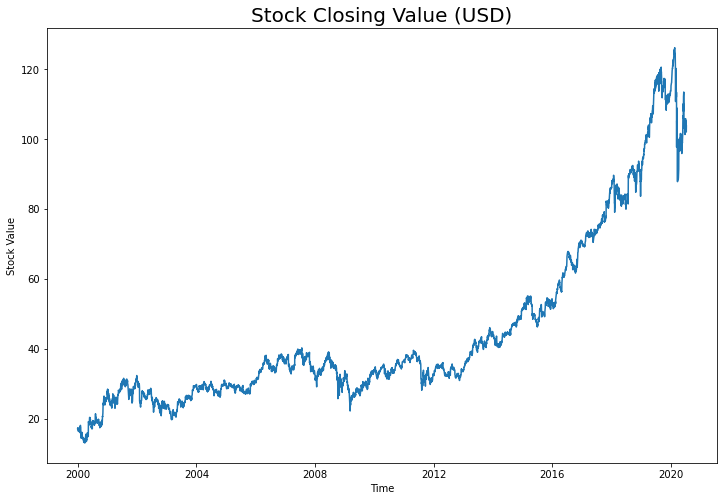

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(data["Close"])
plt.title('Stock Closing Value (USD)', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')

# Stock Data Manipulation

Moving averages are created by averaging over historical price data, and result in a curve that smooths out price over time. They can be useful indicators for traders, particuarly when different moving averages cross as this can indicate an uptrend/ downtrend in price. An uptrend commonly occurs when a shorter day (low latency) moving average crosses and remains above a longer day (high latency) moving average, and vice versa for a downtrend.

1. A moving average (MA) is a stock indicator that is commonly used in technical analysis.

2. The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.

3. A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.

For more info, visit- https://www.investopedia.com/terms/m/movingaverage.asp

In [9]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,17.437500,16.875000,17.000000,17.187500,2933200.0,10.462649
2000-01-03,17.875000,16.687500,17.750000,17.375000,3833200.0,10.576781
2000-01-04,18.000000,17.125000,17.312500,17.312500,4736900.0,10.538737
2000-01-05,17.625000,17.187500,17.250000,17.375000,2676000.0,10.576781
2000-01-06,17.375000,16.687500,17.375000,17.250000,2428500.0,10.500694
...,...,...,...,...,...,...
2020-07-06,106.089996,104.419998,105.790001,105.209999,1868200.0,105.209999
2020-07-07,105.260002,104.320000,104.720001,104.620003,1585000.0,104.620003
2020-07-08,104.510002,102.480003,104.050003,103.120003,1728400.0,103.120003


In [10]:
# Create, and add 100 day moving average to dataframe
data['100ma'] = data['Close'].rolling(window=100,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
1999-12-31,17.4375,16.8750,17.0000,17.1875,2933200.0,10.462649,17.187500
2000-01-03,17.8750,16.6875,17.7500,17.3750,3833200.0,10.576781,17.281250
2000-01-04,18.0000,17.1250,17.3125,17.3125,4736900.0,10.538737,17.291667
2000-01-05,17.6250,17.1875,17.2500,17.3750,2676000.0,10.576781,17.312500
2000-01-06,17.3750,16.6875,17.3750,17.2500,2428500.0,10.500694,17.300000


Text(0, 0.5, 'Stock Value')

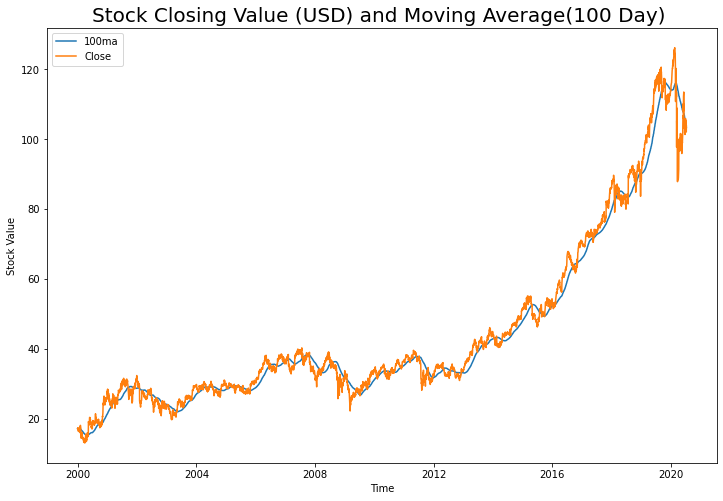

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(data[["100ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(100 Day) ', fontsize = 20)
plt.legend(labels=data[["100ma","Close"]])
plt.xlabel('Time')
plt.ylabel('Stock Value')

In [14]:
# Create, and add 180 day moving average to dataframe
data['180ma'] = data['Close'].rolling(window=180,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma,180ma
Date,,,,,,,,
1999-12-31,17.4375,16.8750,17.0000,17.1875,2933200.0,10.462649,17.187500,17.187500
2000-01-03,17.8750,16.6875,17.7500,17.3750,3833200.0,10.576781,17.281250,17.281250
2000-01-04,18.0000,17.1250,17.3125,17.3125,4736900.0,10.538737,17.291667,17.291667
2000-01-05,17.6250,17.1875,17.2500,17.3750,2676000.0,10.576781,17.312500,17.312500
2000-01-06,17.3750,16.6875,17.3750,17.2500,2428500.0,10.500694,17.300000,17.300000


Text(0, 0.5, 'Stock Value')

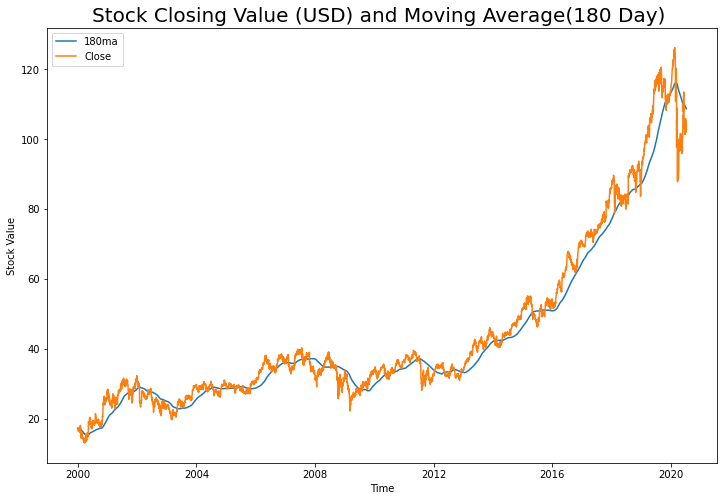

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(data[["180ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(180 Day) ', fontsize = 20)
plt.legend(labels=data[["180ma","Close"]])
plt.xlabel('Time')
plt.ylabel('Stock Value')

In [16]:
# Create, and add 360 day moving average to dataframe
data['360ma'] = data['Close'].rolling(window=360,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma,180ma,360ma
Date,,,,,,,,,
1999-12-31,17.4375,16.8750,17.0000,17.1875,2933200.0,10.462649,17.187500,17.187500,17.187500
2000-01-03,17.8750,16.6875,17.7500,17.3750,3833200.0,10.576781,17.281250,17.281250,17.281250
2000-01-04,18.0000,17.1250,17.3125,17.3125,4736900.0,10.538737,17.291667,17.291667,17.291667
2000-01-05,17.6250,17.1875,17.2500,17.3750,2676000.0,10.576781,17.312500,17.312500,17.312500
2000-01-06,17.3750,16.6875,17.3750,17.2500,2428500.0,10.500694,17.300000,17.300000,17.300000


Text(0, 0.5, 'Stock Value')

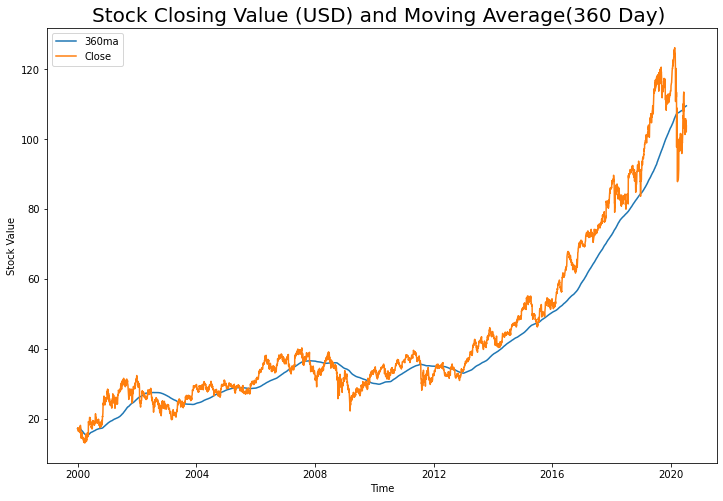

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(data[["360ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(360 Day) ', fontsize = 20)
plt.legend(labels=data[["360ma","Close"]])
plt.xlabel('Time')
plt.ylabel('Stock Value')

# Key Findings-

1. The individual closing prices seem to very random and we cannot clearly understand them, using the technique of moving average, we are able to understand some stuff. 

2. The 100 day MA suggests that there were high ups and downs between 2002 and 2012, but after 2012 the company shares have continued to rise in value, indicating that the company is gaining value.

3. Similar findings are suggested by the 180 and 360 day moving average. 

# Resampling

Resampling is a very useful operation in Pandas for manipulating time series data. It involves changing the frequency of your time series observations.

There are two types of resampling:

Upsampling: Where you increase the frequency of the samples (e.g. minutes  →  seconds)

Downsampling: Where you decrease the frequency of the samples (e.g. days  →  months)

In [38]:
# Resample to get open-high-low-close (OHLC) on every 50 days of data
df_ohlc_50 = data.Close.resample('50D').ohlc() 
df_volume_50 = data.Volume.resample('50D').sum()

In [39]:
df_ohlc_50.head()

,open,high,low,close
Date,,,,
1999-12-31,17.1875,18.1250,14.5000,15.5000
2000-02-19,16.1250,16.1250,13.0625,14.9375
2000-04-09,15.5625,20.3750,13.5000,20.3750
2000-05-29,20.2500,20.3750,17.1250,19.0000
2000-07-18,18.8125,21.4375,18.1250,18.8750


In [40]:
df_volume_50.head()

Date
1999-12-31    105782400.0
2000-02-19    105656900.0
2000-04-09     84342000.0
2000-05-29     58136500.0
2000-07-18     55838000.0
Freq: 50D, Name: Volume, dtype: float64

In [41]:
df_ohlc_50.reset_index(inplace=True)
df_ohlc_50.Date = df_ohlc_50.Date.map(mdates.date2num)
df_ohlc_50.head()

,Date,open,high,low,close
0,730119.0,17.1875,18.1250,14.5000,15.5000
1,730169.0,16.1250,16.1250,13.0625,14.9375
2,730219.0,15.5625,20.3750,13.5000,20.3750
3,730269.0,20.2500,20.3750,17.1250,19.0000
4,730319.0,18.8125,21.4375,18.1250,18.8750


# CandleStick Charts

1. Candlestick charts are used by traders to determine possible price movement based on past patterns.
2. Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.
3. Many algorithms are based on the same price information shown in candlestick charts.
4. Trading is often dictated by emotion, which can be read in candlestick charts.

More Information- https://www.investopedia.com/trading/candlestick-charting-what-is-it/

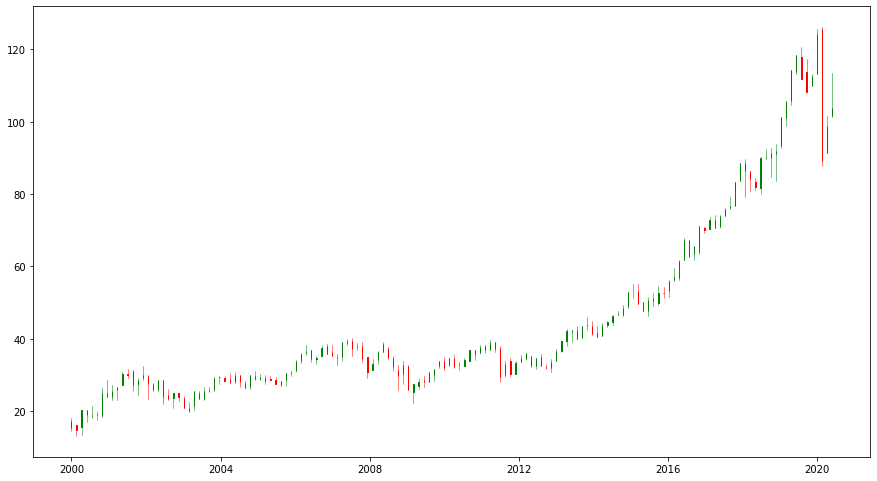

In [43]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc_50.values, width=2, colorup='g')
plt.show()

In [54]:
#taking other dateframe data


#WM 
#Getting stock price data

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()
df = web.DataReader("WM", 'yahoo', start, end)  # Collects data
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

#prices in USD

In [55]:
#Making the data as csv

df.to_csv("WM_data_2016.csv")

In [57]:
#Reading the same data from local csv file

data_2016=pd.read_csv("WM_data_2016.csv" ,parse_dates=True, index_col=0)

In [58]:
data_2016.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,53.970001,53.349998,53.830002,53.369999,1055200.0,48.401115
2016-01-04,52.610001,52.000000,52.599998,52.450001,2067400.0,47.566776
2016-01-05,52.700001,52.230000,52.419998,52.650002,2401400.0,47.748161
2016-01-06,53.320000,52.119999,52.169998,53.299999,3277400.0,48.337643
2016-01-07,53.049999,52.419998,52.580002,52.669998,3309900.0,47.766300


# 10 days candlestick

In [62]:
# Resample to get open-high-low-close (OHLC) on every 10 days of data
df_ohlc_10 = data_2016.Close.resample('10D').ohlc() 
df_volume_10 = data_2016.Volume.resample('10D').sum()

In [63]:
df_ohlc_10.reset_index(inplace=True)
df_ohlc_10.Date = df_ohlc_10.Date.map(mdates.date2num)
df_ohlc_10.head()

,Date,open,high,low,close
0,735963.0,53.369999,53.369999,52.349998,52.349998
1,735973.0,52.860001,53.200001,51.520000,52.619999
2,735983.0,51.919998,52.980000,51.889999,52.950001
3,735993.0,53.259998,53.259998,52.119999,52.700001
4,736003.0,53.279999,55.310001,52.959999,55.310001


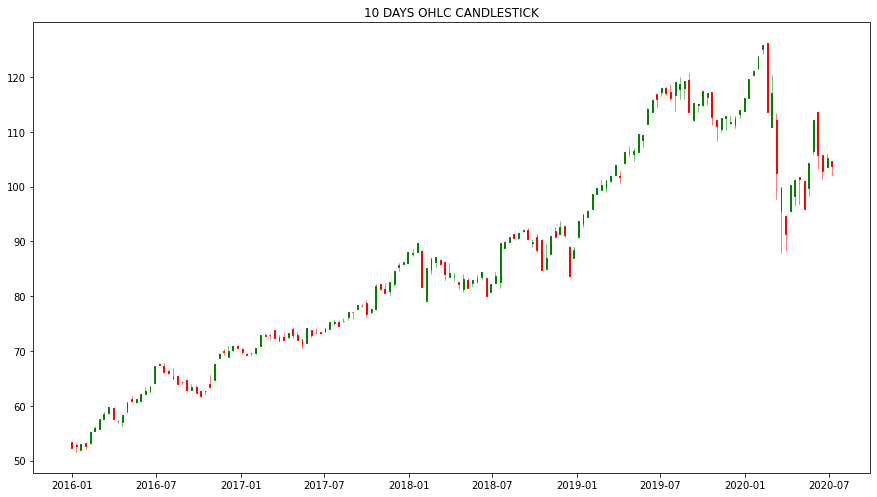

In [68]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc_10.values, width=2, colorup='g')
plt.title("10 DAYS OHLC CANDLESTICK")
plt.show()

# 20 days candlestick

In [65]:
# Resample to get open-high-low-close (OHLC) on every 20 days of data
df_ohlc_20 = data_2016.Close.resample('20D').ohlc() 
df_volume_20 = data_2016.Volume.resample('20D').sum()

In [66]:
df_ohlc_20.reset_index(inplace=True)
df_ohlc_20.Date = df_ohlc_20.Date.map(mdates.date2num)
df_ohlc_20.head()

,Date,open,high,low,close
0,735963.0,53.369999,53.369999,51.520000,52.619999
1,735983.0,51.919998,53.259998,51.889999,52.700001
2,736003.0,53.279999,56.299999,52.959999,56.040001
3,736023.0,55.849998,58.830002,55.849998,58.599998
4,736043.0,58.730000,59.709999,57.590000,57.669998


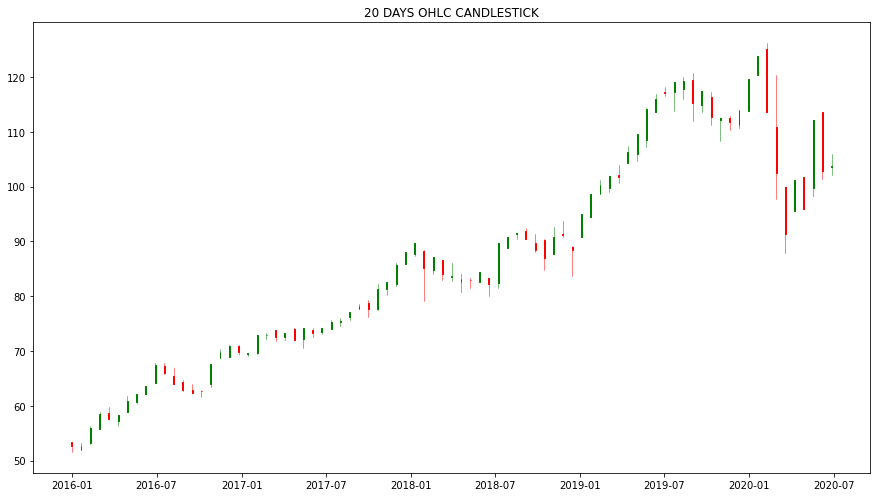

In [69]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc_20.values, width=2, colorup='g')
plt.title("20 DAYS OHLC CANDLESTICK")
plt.show()

# Key Takeaways-

1. Green indicates a rise in stock price, whereas red indicates a decrease.

2. The candlesticks till 2020 indicate a bullish pattern. This means that overally, the stocks are likely to increase. 

3. More greens than reds.

4. However there are sudden reds in 2020. There have been large socio-political aspects in 2020 like US tensions in middle east, Covid-19 outbreak and aggresive policies of China. This indicates that there have been large turmoils.